In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:

# importing libraries and dependecies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.tools import freeze_graph

import tensorflow as tf
import pickle
import os


In [0]:

def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))


def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity,df):
    data = df[df['activity'] == activity][['ax', 'ay', 'az']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
#    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
#    plot_axis(ax0, data['time'], data['fox'], 'x-axis')
#    plot_axis(ax1, data['time'], data['foy'], 'y-axis')
#    plot_axis(ax2, data['time'], data['foz'], 'z-axis')
#    plt.subplots_adjust(hspace=0.2)
#    fig.suptitle(activity + " Fused Values")
#    plt.subplots_adjust(top=0.90)
#    plt.show()
    

def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        start += (size / 2)


def segment_signal(df,N_TIME_STEPS,step):
        
    segments = []
    labels = []
    for i in range(0, len(df) - N_TIME_STEPS, step):
        ax = df["la_x"].values[i:i+N_TIME_STEPS]
        ay = df["la_y"].values[i:i+N_TIME_STEPS]
        az = df["la_z"].values[i:i+N_TIME_STEPS]
        fox = df["gx"].values[i:i+N_TIME_STEPS]
        foy = df["gy"].values[i:i+N_TIME_STEPS]
        foz = df["gz"].values[i:i+N_TIME_STEPS]
        label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([ax,ay,az,fox,foy,foz])
        labels.append(label)
    return segments, labels

def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)
    

In [0]:


logs_dir = './logs'
#from comp_filter import Filter
#K.set_image_dim_ordering('th')
# setting up a random seed for reproducibility
random_seed = 611
np.random.seed(random_seed)

# matplotlib inline
plt.style.use('ggplot')
# defining function for loading the dataset
#
# The number of steps within one time segment
N_TIME_STEPS  = 200
# The steps to take from one segment to the next; if this value is equal to
# N_TIME_STEPS , then there is no overlap between the segments
step = 20
#
N_FEATURES = 6
N_CLASSES = 3

In [0]:
%cd ../gdrive
%cd 'My Drive'/RP/NN/Colab
%ls

/gdrive
/gdrive/My Drive/RP/NN/Colab
checkpoint/     colab_v2_test.csv  HAR_v0.ipynb  har_v3.1.py
colab_v2.1.csv  HAR.ipynb          HAR_v1.ipynb  Old/


In [0]:
dataset= pd.read_csv("colab_v2.1.csv")
testset= pd.read_csv("colab_v2_test.csv")

# Segmenting the signal in overlapping windows of 90 samples with 50% overlap
segments, labels = segment_signal(dataset,N_TIME_STEPS ,step)

np.array(segments).shape


reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS , N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=0)

# Segmenting the test set
# Segmenting the signal in overlapping windows of 90 samples with 50% overlap
test_segments, test_labels = segment_signal(testset,N_TIME_STEPS ,step)

np.array(segments).shape
#
#test_labels[0] = 0
#test_labels[2] = 2
test_reshaped_segments = np.asarray(test_segments, dtype= np.float32).reshape(-1, N_TIME_STEPS , N_FEATURES)
test_labels = np.asarray(pd.get_dummies(test_labels), dtype = np.float32)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [0]:

#-----------------------------Creating The Model-------------------------------------------

# Our model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:
def create_LSTM_model(inputs, batch_size, N_HIDDEN_UNITS):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }

    with tf.name_scope('inputs'):
        X = tf.transpose(inputs, [1, 0, 2])
        X = tf.reshape(X, [-1, N_FEATURES])
        # Keep probability placeholder for drop out layers
#        keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    with tf.name_scope('hidden'):
        hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])  
        hidden = tf.split(hidden, N_TIME_STEPS, 0)
    tf.summary.histogram("hidden", hidden)  
#    tf.summary.histogram('hidden1', hidden)


    # Stack 2 LSTM layers
    lstm_layers = [tf.nn.rnn_cell.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.nn.rnn_cell.MultiRNNCell(lstm_layers)
    
    ### Run the data through the RNN layers
    with tf.name_scope("RNN_forward"):
    # Run each sequence step through the RNN with tf.nn.dynamic_rnn 
        outputs, _ = tf.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)          

    # Get output for the last time step
    lstm_last_output = outputs[-1]
    tf.summary.histogram("lstm_last_output", lstm_last_output)  
#    tf.summary.histogram('lstm_last_output', lstm_last_output)

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


In [0]:


def run_model(N_TIME_STEPS,BATCH_SIZE, LEARNING_RATE,N_EPOCHS, N_HIDDEN_UNITS,L2_LOSS, log_type,train_writer,
              test_writer,validation_writer,early_stopping_step):
    #placeholders for our model:

    best_acc = 0
    stopping_step =0;
    tf.reset_default_graph()
    
    X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
    Y = tf.placeholder(tf.float32, [None, N_CLASSES])
    
    # Note that we named the input tensor, that will be useful when using the model from Android. Creating the model:
    pred_Y = create_LSTM_model(X,BATCH_SIZE, N_HIDDEN_UNITS)
    tf.summary.histogram("matmul", pred_Y) 
    
    pred_softmax = tf.nn.softmax(pred_Y, name="y_")
    tf.summary.histogram("pred_softmax", pred_softmax)  
    
    
#    # Again, we must properly name the tensor from which we will obtain predictions. We will use L2 regularization and that must be noted in our loss op:
#    L2_LOSS = 0.0015
    
    l2 = L2_LOSS * \
        sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2
    tf.summary.scalar('loss', loss)
    
    
    #optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)
    with tf.name_scope('train'):
      optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)
    
    
    with tf.name_scope('accuracy'):
      with tf.name_scope('correct_prediction'):
        correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
      with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    tf.summary.scalar('accuracy', accuracy)
    
    saver = tf.train.Saver()
    
    history = dict(train_loss=[], 
                         train_acc=[], 
                         test_loss=[], 
                         test_acc=[])
    
    sess=tf.InteractiveSession()
    merged = tf.summary.merge_all()
    
    
    sess.run(tf.global_variables_initializer())
    
    
    train_count = len(X_train)
    
    for i in range(1, N_EPOCHS + 1):
        for start, end in zip(range(0, train_count, BATCH_SIZE),
                              range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
            sess.run([optimizer], feed_dict={X: X_train[start:end],
                                           Y: y_train[start:end]})
    
        _, acc_train, loss_train,summary = sess.run([pred_softmax, accuracy, loss,merged], feed_dict={
                                                X: X_train, Y: y_train})
            
        history['train_loss'].append(loss_train)
        history['train_acc'].append(acc_train)
        
#        train_writer.add_summary(summary, i)
        if (acc_train > best_acc):
            stopping_step = 0
            best_acc = acc_train
        else:
            stopping_step += 1
        if stopping_step >= early_stopping_step:
            print("Early stopping is trigger at step: {} acc:{}".format(i,acc_train))
            break;
    
    
        if i != 1 and i % 10 != 0:
            continue
    
        _, acc_test, loss_test, summary = sess.run([pred_softmax, accuracy, loss,merged], feed_dict={
                                                X: X_test, Y: y_test})
#        test_writer.add_summary(summary, i)
    
        history['test_loss'].append(loss_test)
        history['test_acc'].append(acc_test)
        print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test} | train accuracy: {acc_train} loss :{loss_train}')
        
        
    print("Flushing writer data..")
    
    
#     predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})
    
    print()
    
    
    #Validation with test data
    pred , acc_test, loss_test, summary = sess.run([pred_softmax, accuracy, loss,merged], feed_dict={X: test_reshaped_segments, Y: test_labels})
    print(f'final results: accuracy: {acc_test} loss: {loss_test}')
    printCM(pred, test_labels)
#     validation_writer.add_summary(summary, i)
    
    
#    train_writer.flush()
#    test_writer.flush()
#    validation_writer.flush()
#    
#    train_writer.close()
#    test_writer.close()
#    validation_writer.close()
    
    return history, pred, sess, acc_test, loss_test, saver

In [0]:
#--------------------------------- Parameter tuning -----------------------------------
performance_records = {}
def generate_random_hyperparams(lr_min, lr_max, bt_min, bt_max,hu_min, hu_max, ep_min, ep_max, l2_min, l2_max):
    '''generate random learning rate and keep probability'''
    # random search through log space for learning rate
    random_learning_rate = np.random.uniform(lr_min, lr_max)
    random_learning_rate = random_learning_rate * 10**(-3)
    
    
    random_l2loss_rate = np.random.uniform(l2_min, l2_max)
    random_l2loss_rate = random_l2loss_rate * 10**(-3)
    
    random_batch_size = np.random.uniform(bt_min, bt_max)
    hidden_units = np.random.uniform(hu_min, hu_max)
    epochs = np.random.uniform(ep_min, ep_max)
    return random_learning_rate,int(random_batch_size) ,int(hidden_units), int(epochs), random_l2loss_rate
  

#tf.InteractiveSession.close(sess)
#performance_records[(epochs, hidden_units)] = { 'acc_final' : acc_final, 'loss_final' : loss_final}

#-----------------------------------------Evaluation-------------------------------
def printCM(predictions ,y_test):

  LABELS = ['Walking Fast', 'Walking Normal', 'Walking Slow']

  max_test = np.argmax(y_test, axis=1)
  max_predictions = np.argmax(predictions, axis=1)
  confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

  plt.figure(figsize=(5, 3))
  sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show();

  print(classification_report(max_test, max_predictions))

In [0]:
print(generate_random_hyperparams(3, 1, 50, 500, 50, 80, 10, 50,5,1)  )

(0.002387382732544653, 329, 66, 34, 0.004610952257891592)


In [0]:

# from tensorboardcolab import * 
# tbc=TensorBoardColab()
# testWriter = tbc.get_writer()
# trainWriter = tbc.get_writer()
# validationWriter = tbc.get_writer()

# # trainWriter=TensorBoardColab()
# # validationWriter=TensorBoardColab()

Model :  0
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  72
epochs :  10
l2_loss :  0.00460001718199826
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch: 1 test accuracy: 0.7945205569267273 loss: 2.992459297180176 | train accuracy: 0.7754868268966675 loss :2.9884955883026123
epoch: 10 test accuracy: 1.0 loss: 2.1752607822418213 | train accuracy: 1.0 loss :2.1760036

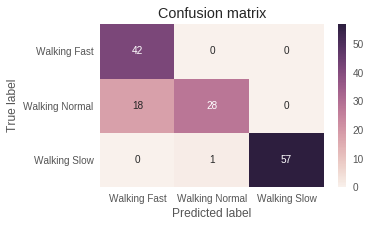

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        42
           1       0.97      0.61      0.75        46
           2       1.00      0.98      0.99        58

   micro avg       0.87      0.87      0.87       146
   macro avg       0.89      0.86      0.85       146
weighted avg       0.90      0.87      0.87       146

Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/0/har.ckpt
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  1
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  76
epochs :  10
l2_loss :  0.004604508040345335
epoch: 1 test accur

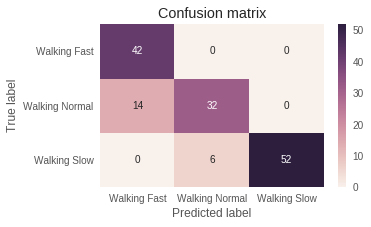

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        42
           1       0.84      0.70      0.76        46
           2       1.00      0.90      0.95        58

   micro avg       0.86      0.86      0.86       146
   macro avg       0.86      0.86      0.85       146
weighted avg       0.88      0.86      0.86       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/1/har.ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  2
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  69
epochs :  10
l2_loss :  0.0035666849709870855
epoch: 1 test accuracy: 0.8127853870391846 loss: 2.1870579719543457 | train accuracy: 0.7628865838050842 loss :2.2269463539123535
Early stopping is trigger at step: 8 acc:0.9977090358734131
Flushing writer data..

final results: accuracy: 0.6232876777648926 loss: 3.489118814468384


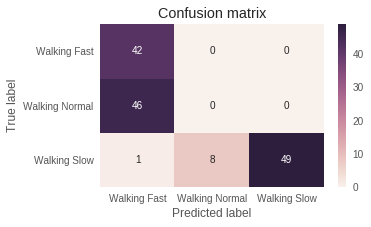

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        42
           1       0.00      0.00      0.00        46
           2       1.00      0.84      0.92        58

   micro avg       0.62      0.62      0.62       146
   macro avg       0.49      0.61      0.52       146
weighted avg       0.53      0.62      0.55       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/2/har.ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  3
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  68
epochs :  10
l2_loss :  0.002575731066392721
epoch: 1 test accuracy: 0.9726027250289917 loss: 1.7406196594238281 | train accuracy: 0.9633448123931885 loss :1.7082231044769287
Early stopping is trigger at step: 7 acc:0.9518900513648987
Flushing writer data..

final results: accuracy: 0.835616409778595 loss: 2.234753370285034


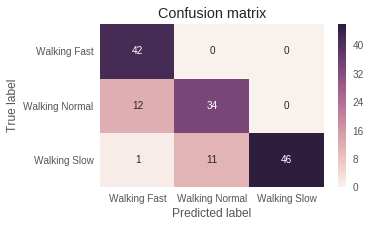

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        42
           1       0.76      0.74      0.75        46
           2       1.00      0.79      0.88        58

   micro avg       0.84      0.84      0.84       146
   macro avg       0.84      0.84      0.83       146
weighted avg       0.85      0.84      0.84       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/3/har.ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  4
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  61
epochs :  10
l2_loss :  0.0018412097369527416
epoch: 1 test accuracy: 0.6757990717887878 loss: 1.504288911819458 | train accuracy: 0.6620847582817078 loss :1.508293628692627
Early stopping is trigger at step: 9 acc:1.0
Flushing writer data..

final results: accuracy: 0.8561643958091736 loss: 1.5737354755401611


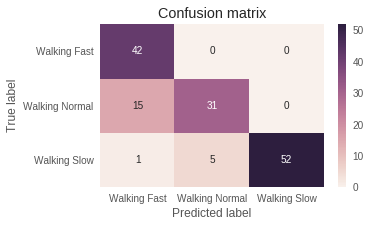

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        42
           1       0.86      0.67      0.76        46
           2       1.00      0.90      0.95        58

   micro avg       0.86      0.86      0.86       146
   macro avg       0.86      0.86      0.85       146
weighted avg       0.88      0.86      0.86       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/4/har.ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  5
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  62
epochs :  10
l2_loss :  0.0012201337567892448
epoch: 1 test accuracy: 0.7853881120681763 loss: 1.0723636150360107 | train accuracy: 0.7640320658683777 loss :1.0656185150146484
Early stopping is trigger at step: 6 acc:0.904925525188446
Flushing writer data..

final results: accuracy: 0.9383561611175537 loss: 0.7662841081619263


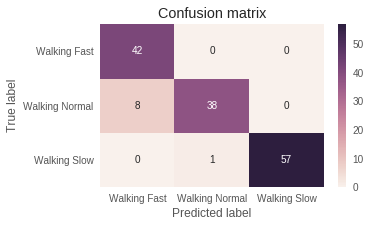

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        42
           1       0.97      0.83      0.89        46
           2       1.00      0.98      0.99        58

   micro avg       0.94      0.94      0.94       146
   macro avg       0.94      0.94      0.93       146
weighted avg       0.95      0.94      0.94       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/5/har.ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
Model :  6
random_learning_rate :  0.00152764369127745
random_batch_size :  100
hidden_units :  64
epochs :  10
l2_loss :  0.003799503569014514
epoch: 1 test accuracy: 0.7808219194412231 loss: 2.253584623336792 | train accuracy: 0.7663230299949646 loss :2.2429044246673584
epoch: 10 test accuracy: 1.0 loss: 1.5889244079589844 | train accuracy: 1.0 loss :1.5893267393112183
Early stopping is trigger at step: 11 acc:0.9988545179367065
Flushing writer data.

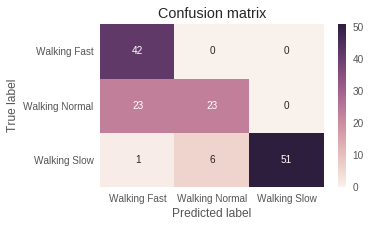

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        42
           1       0.79      0.50      0.61        46
           2       1.00      0.88      0.94        58

   micro avg       0.79      0.79      0.79       146
   macro avg       0.81      0.79      0.78       146
weighted avg       0.83      0.79      0.79       146

INFO:tensorflow:Restoring parameters from ./checkpoint/v5_DS_2_1/6/har.ckpt


In [0]:
# Acc 95 .. Early Stopping at step 6
# Model :  5
# random_learning_rate :  0.00152764369127745
# random_batch_size :  100
# hidden_units :  62
# epochs :  10
# l2_loss :  0.0012201337567892448
  
  
  
L2_LOSS = 0.003799503569014514
#0.00214326216571743

N_HIDDEN_UNITS = 64
#79

N_EPOCHS = 50
# should ideally be  above 1000 say 1024
BATCH_SIZE = 100

#  define optimizer and accuracy ops:
LEARNING_RATE = 0.00152764369127745




for i in range(10): # random search hyper-parameter space 10 times for best epochs and hidden units with fixed lr and bs

  print("==============================================================================================")
  random_learning_rate, random_batch_size, hidden_units, epochs , l2_loss= generate_random_hyperparams(3, 1, 50, 500, 60, 80, 10, 50,5,1) 
  print("Model : ", i)    
  print("random_learning_rate : ", LEARNING_RATE)    
  print("random_batch_size : ", BATCH_SIZE)    
  print("hidden_units : ", hidden_units)    
  print("epochs : ", 10)    
  print("l2_loss : ", l2_loss)    

  history, predictions, sess, acc_final, loss_final, saver = run_model(N_TIME_STEPS,BATCH_SIZE, LEARNING_RATE, N_EPOCHS, 
                                                                     hidden_units,l2_loss, "epochs_hu",None,
                                                                     None,None,3)

#   performance_records[(random_batch_size, random_learning_rate,hidden_units,l2_loss)] = { 'acc_final' : acc_final, 'loss_final' : loss_final}
  

  #------------------------------------Exporting the model------------------------------------

  # Storing model to disk
  DUMP_DIR = './checkpoint/v5_DS_2_1/' + str(i) + "/"

  if not os.path.exists(DUMP_DIR):
      os.makedirs(DUMP_DIR)
  pickle.dump(predictions, open(DUMP_DIR + "predictions.p", "wb"))
  pickle.dump(history, open(DUMP_DIR + "history.p", "wb"))
  tf.train.write_graph(sess.graph_def, '.', DUMP_DIR + 'har.pbtxt')  
  saver.save(sess, save_path = DUMP_DIR + "har.ckpt")
  sess.close()
  
  f= open( DUMP_DIR + "README.txt","w+")  
  f.write(f'final results: LEARNING_RATE: {LEARNING_RATE} \nrandom_batch_size: {100}\n N_HIDDEN_UNITS: {hidden_units}\n N_EPOCHS: {10}\n L2_LOSS: {l2_loss}\n')
  f.close() 


  MODEL_NAME = 'har'

  input_graph_path =  DUMP_DIR +  MODEL_NAME +'.pbtxt'
  checkpoint_path =  DUMP_DIR + MODEL_NAME + '.ckpt'
  restore_op_name = "save/restore_all"
  filename_tensor_name = "save/Const:0"
  output_frozen_graph_name =DUMP_DIR + 'frozen_v4_'+MODEL_NAME+'.pb'

  freeze_graph.freeze_graph(input_graph_path, input_saver="",
                            input_binary=False, input_checkpoint=checkpoint_path, 
                            output_node_names="y_", restore_op_name="save/restore_all",
                            filename_tensor_name="save/Const:0", 
                            output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")

  tf.InteractiveSession.close(sess)
# sess.close()